In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import time
import psutil
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [5]:
file_path = r"C:\Users\Shafiya mariyam\Downloads\tourism_dataset.csv"  # Update with the correct file path
dataset = pd.read_csv(file_path)

In [6]:
dataset_cleaned = dataset.drop(columns=["Unnamed: 6"], errors="ignore")
dataset_cleaned = dataset_cleaned.dropna()


In [7]:
label_encoder = LabelEncoder()
categorical_columns = ["Location", "Country", "Category"]
for col in categorical_columns:
    dataset_cleaned[col] = label_encoder.fit_transform(dataset_cleaned[col])

dataset_cleaned["Revenue"] = pd.to_numeric(dataset_cleaned["Revenue"], errors="coerce")
dataset_cleaned = dataset_cleaned.dropna()

In [8]:
features = ["Location", "Country", "Category", "Visitors", "Rating", "Revenue"]
scaler = StandardScaler()
normalized_data = scaler.fit_transform(dataset_cleaned[features])


In [27]:
pca = PCA()
execution_times = []
memory_usages = []
output_quality = []
sample_sizes = [0.1, 0.3, 0.5, 0.7, 1.0]

In [28]:
for sample_size in sample_sizes:
    sample_data = normalized_data[:int(sample_size * len(normalized_data))]

In [30]:
    start_time = time.time()
    pca_result = pca.fit_transform(sample_data)
    execution_time = time.time() - start_time
    execution_times.append(execution_time)
    

In [31]:
    process = psutil.Process()
    memory_usage = process.memory_info().rss / 1024 ** 2  # Convert to MB
    memory_usages.append(memory_usage)

In [32]:
explained_variance = pca.explained_variance_ratio_.cumsum()
output_quality.append(explained_variance[1])

In [34]:
num_clusters = 4  # Choose the number of clusters
pca_result_full = PCA(n_components=2).fit_transform(normalized_data)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(pca_result_full)

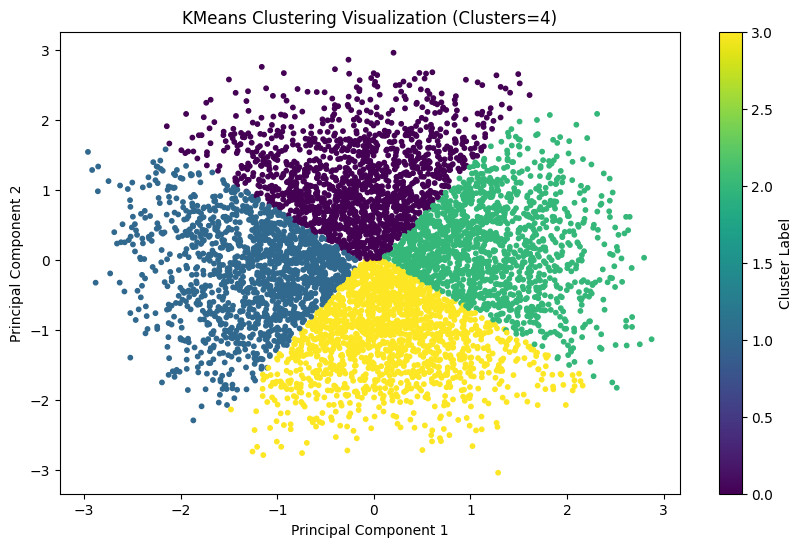

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result_full[:, 0], pca_result_full[:, 1], c=labels, cmap="viridis", s=10)
plt.title(f"KMeans Clustering Visualization (Clusters={num_clusters})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

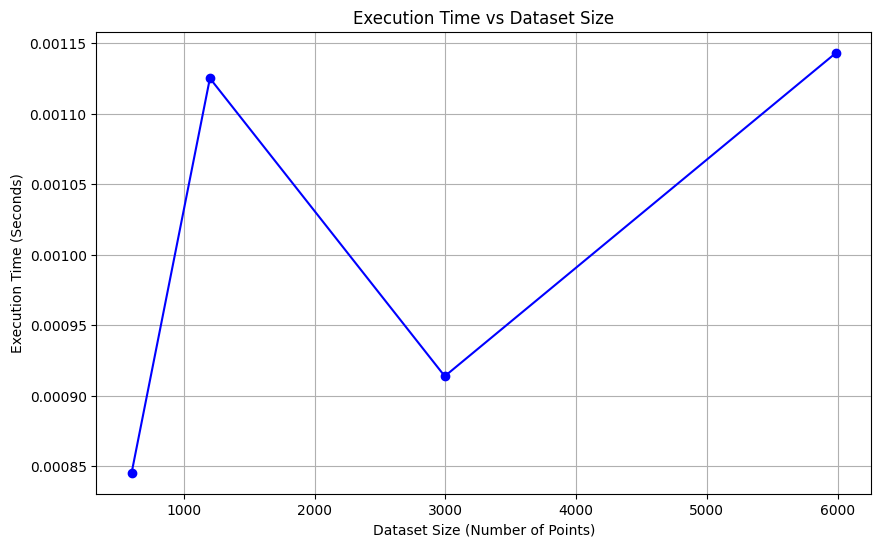

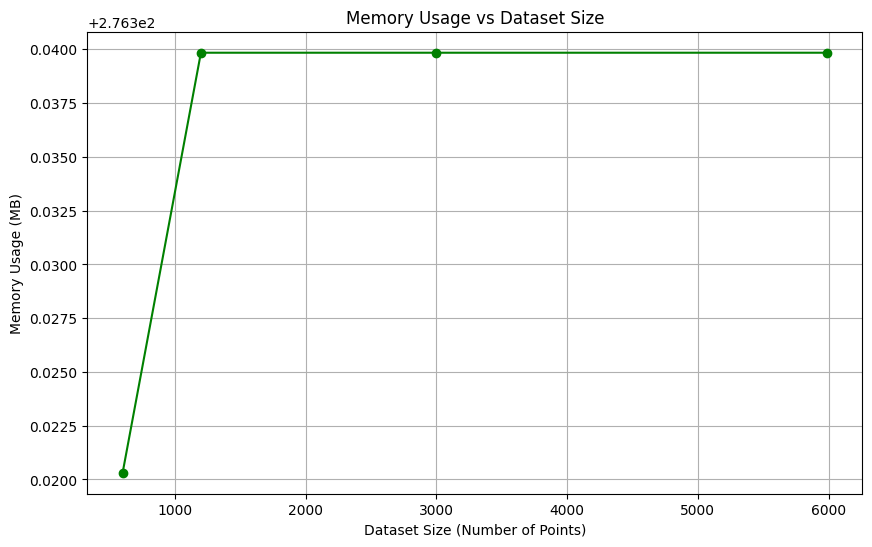

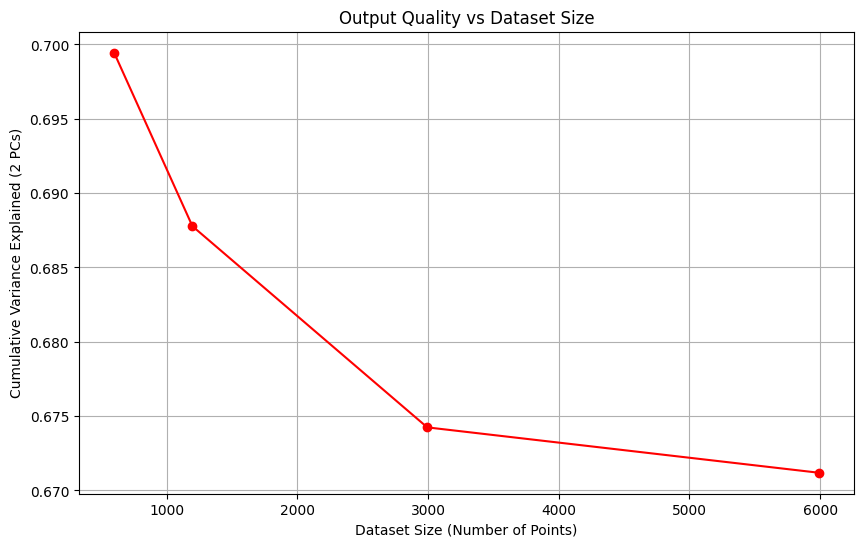

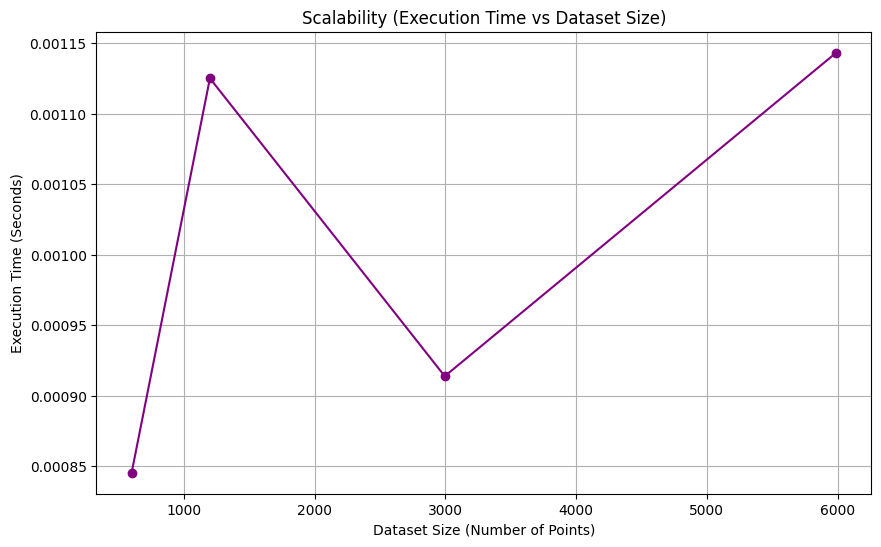

In [38]:
import matplotlib.pyplot as plt
import time
import psutil
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Data preparation
scaler = StandardScaler()
normalized_data = scaler.fit_transform(dataset[["Visitors", "Rating", "Revenue"]].values)

# Parameters
subset_sizes = [0.1, 0.2, 0.5, 1.0]  # Fractions of the dataset size
execution_times = []
memory_usages = []
output_qualities = []

# Measure metrics for each subset size
for fraction in subset_sizes:
    subset_size = int(len(normalized_data) * fraction)
    X_subset = normalized_data[:subset_size]
    
    # Execution Time
    start_time = time.time()
    pca = PCA()
    pca_result = pca.fit_transform(X_subset)
    execution_time = time.time() - start_time
    execution_times.append(execution_time)
    
    # Memory Usage
    process = psutil.Process()
    memory_usage = process.memory_info().rss / 1024 ** 2  # Convert to MB
    memory_usages.append(memory_usage)
    
    # Output Quality
    explained_variance = pca.explained_variance_ratio_.cumsum()
    output_qualities.append(explained_variance[1])  # Take cumulative variance for the 2nd PC

# Plot 1: Execution Time vs Dataset Size
plt.figure(figsize=(10, 6))
plt.plot([len(normalized_data) * f for f in subset_sizes], execution_times, marker="o", color="b")
plt.title("Execution Time vs Dataset Size")
plt.xlabel("Dataset Size (Number of Points)")
plt.ylabel("Execution Time (Seconds)")
plt.grid()
plt.show()

# Plot 2: Memory Usage vs Dataset Size
plt.figure(figsize=(10, 6))
plt.plot([len(normalized_data) * f for f in subset_sizes], memory_usages, marker="o", color="g")
plt.title("Memory Usage vs Dataset Size")
plt.xlabel("Dataset Size (Number of Points)")
plt.ylabel("Memory Usage (MB)")
plt.grid()
plt.show()

# Plot 3: Output Quality vs Dataset Size
plt.figure(figsize=(10, 6))
plt.plot([len(normalized_data) * f for f in subset_sizes], output_qualities, marker="o", color="r")
plt.title("Output Quality vs Dataset Size")
plt.xlabel("Dataset Size (Number of Points)")
plt.ylabel("Cumulative Variance Explained (2 PCs)")
plt.grid()
plt.show()

# Plot 4: Scalability (Execution Time vs Dataset Size)
plt.figure(figsize=(10, 6))
plt.plot([len(normalized_data) * f for f in subset_sizes], execution_times, marker="o", color="purple")
plt.title("Scalability (Execution Time vs Dataset Size)")
plt.xlabel("Dataset Size (Number of Points)")
plt.ylabel("Execution Time (Seconds)")
plt.grid()
plt.show()
